<a href="https://colab.research.google.com/github/ddiaz63/Data-110/blob/main/week10_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
import pandas as pd
df = pd.read_csv('Daily_Arrests_20241001 (1).csv')
theft_df = df[df["OFFENSE"].str.contains("Theft", case=False, na=False)]
print(theft_df.head())


         LAST NAME FIRST NAME MIDDLE NAME  AGE                         STREET  \
3   PEREZ GONZALES       JOSE         NaN   37  12900 Block Of TWINBROOK PKWY   
13           CLARK    MICHAEL     ALANZOE   40     1300 Block Of new york ave   
14    MEJIA POSADA       RENE   ALEXANDER   26             0 Block Of NINA CT   
22         ESCOBAR   DEYANIRA     HILARIA   35      400 Block Of COLLEGE PKWY   
30            WEST       MAIA   FRANCESCA   28      9900 Block Of BIG ROCK RD   

             CITY STATE ARREST DATE                         OFFENSE  
3       ROCKVILLE    MD  09/19/2024     THEFT: $100 TO UNDER $1,500  
13     WASHINGTON    DC  09/20/2024     THEFT: $100 TO UNDER $1,500  
14   GAITHERSBURG    MD  09/19/2024     THEFT: $100 TO UNDER $1,500  
22      ROCKVILLE    MD  09/20/2024     THEFT: $100 TO UNDER $1,500  
30  SILVER SPRING    MD  09/21/2024  THEFT: $1,500 TO UNDER $25,000  


In [14]:

# Exploratory Data Analysis for the theft-related dataset

# Total number of theft incidents
total_theft_incidents = theft_df.shape[0]

# Range of ages involved in theft offenses
age_min = theft_df['AGE'].min()
age_max = theft_df['AGE'].max()
age_range = (age_min, age_max)

total_theft_incidents, age_range

(96, (18, 67))

**Total Number of Theft Incidents:** 96

**Range of Ages Involved in Theft Offenses:** 18 to 67 years old

<ipython-input-16-f38e5fb040da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['ARREST DATE'] = pd.to_datetime(theft_df['ARREST DATE'])
<ipython-input-16-f38e5fb040da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['DAY_OF_WEEK'] = theft_df['ARREST DATE'].dt.day_name()


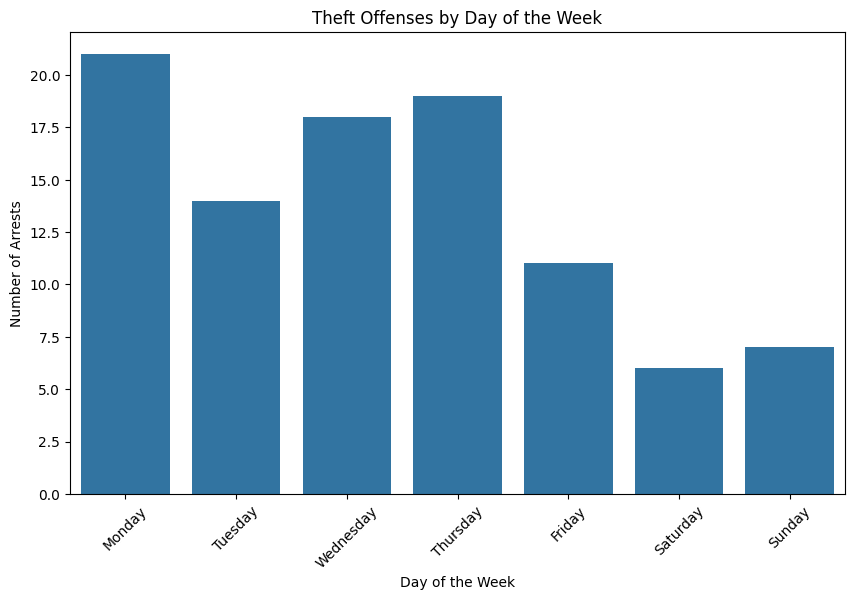

In [16]:

theft_df['ARREST DATE'] = pd.to_datetime(theft_df['ARREST DATE'])

theft_df['DAY_OF_WEEK'] = theft_df['ARREST DATE'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=theft_df, x='DAY_OF_WEEK', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Theft Offenses by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=45)
plt.show()


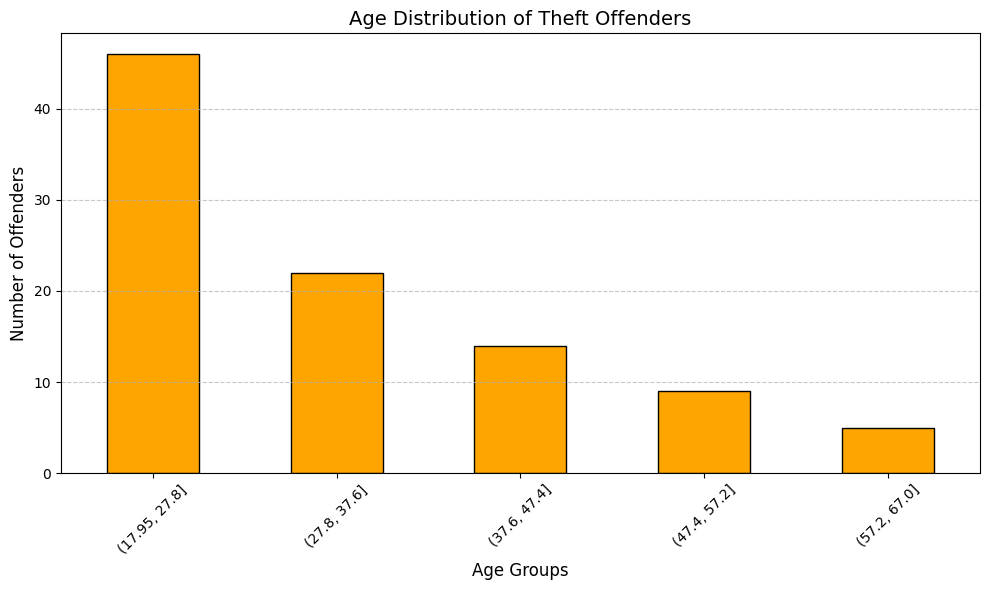

In [17]:
age_distribution = theft_df['AGE'].value_counts(bins=5).sort_index()

# Plot age distribution
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Age Distribution of Theft Offenders', fontsize=14)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Number of Offenders', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Age group most involved in theft offenses
most_involved_age_group = age_distribution.idxmax()
most_involved_age_group_count = age_distribution.max()

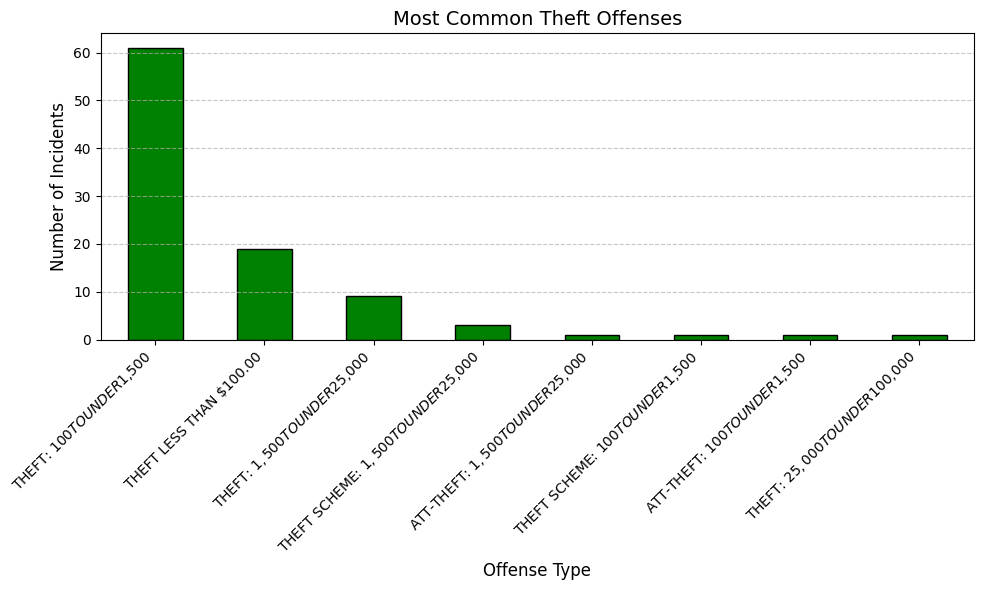

In [18]:
common_theft_offenses = theft_df['OFFENSE'].value_counts()

# Plot the most common theft offenses
plt.figure(figsize=(10, 6))
common_theft_offenses.head(10).plot(kind='bar', color='green', edgecolor='black')
plt.title('Most Common Theft Offenses', fontsize=14)
plt.xlabel('Offense Type', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



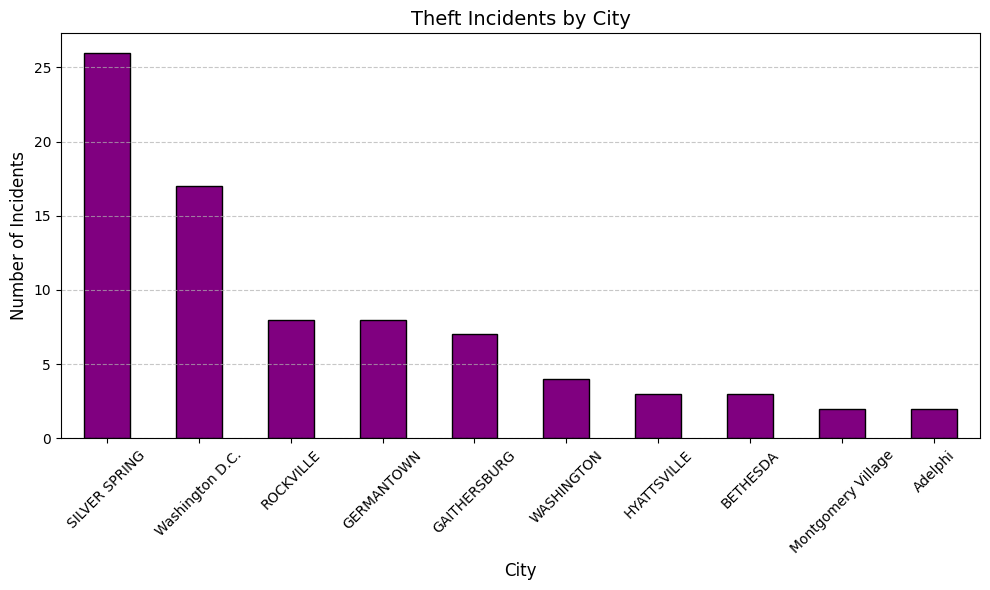

(Interval(17.95, 27.8, closed='right'),
 46,
 OFFENSE
 THEFT: $100 TO UNDER $1,500              61
 THEFT LESS THAN $100.00                  19
 THEFT: $1,500 TO UNDER $25,000            9
 THEFT SCHEME: $1,500 TO UNDER $25,000     3
 ATT-THEFT: $1,500 TO UNDER $25,000        1
 THEFT SCHEME: $100 TO UNDER $1,500        1
 ATT-THEFT: $100 TO UNDER $1,500           1
 THEFT: $25,000 TO UNDER $100,000          1
 Name: count, dtype: int64)

In [19]:
city_theft_counts = theft_df['CITY'].value_counts()

# Plot theft incidents by city
plt.figure(figsize=(10, 6))
city_theft_counts.head(10).plot(kind='bar', color='purple', edgecolor='black')
plt.title('Theft Incidents by City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

most_involved_age_group, most_involved_age_group_count, common_theft_offenses.head(10)